# Goal: understand which factors contribute most to employee turnover
Create a model to predict whether certain employees will leave the company

Data science pipeline:
1. Obtain the data
2. Clean the data, which includes data manipulation of missing/invalid data and editing column names
3. Explore the data to gain further insight into dataset as well as observe any possible outliers. Understand the relationship between each explanatory and response variable with a correlation matrix.
4. Model the data for predictive power
5. Interpet the data to determine the factors that contribute most to employee turnover and the relationship amongst variables found

Dataset found here: https://www.kaggle.com/giripujar/hr-analytics/data

# Obtain the data

In [28]:
# import necessary modules for data manipulation and visual representations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
# Read analytics csv file and store dataset into dataframe df
df = pd.read_csv('datasets_11142_15488_HR_comma_sep.csv', index_col=None)

# Clean the data

In [3]:
# Check if are any missing values in dataset
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [4]:
# quick overview of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# rename certain columns for better comprehension
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [6]:
# move reponse variable "turnover" to front of table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Explore the data

Statistical overview:
Dataset has ~15,000 employee observations and 10 features
The company has a turnover rate of ~24%
Mean employee satisfaction is 0.61

In [7]:
# dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [8]:
# check type of features
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department              object
salary                  object
dtype: object

In [9]:
# ~76% of employees stayed and 24% of employees left -- when performing cross validation, important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [10]:
# Display statistical overview of employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
# overview of summary (turnover vs non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation matrix and heatmap

Highly correlated features:

(+) projectCount, averageMonthlyHours, evaluation
(-) turnover, satisfaction

The heatmap displays a heavy positive(+) correlation between projectCount, averageMonthlyHours, and evaluation, likely meaning employees who spent more hours and worked on more projects were highly evaluated.

Turnover and satisfaction are highly negatively(-) correlated, which could mean employees tend to leave when they are less satisfied.

AttributeError: module 'seaborn' has no attribute 'plt'

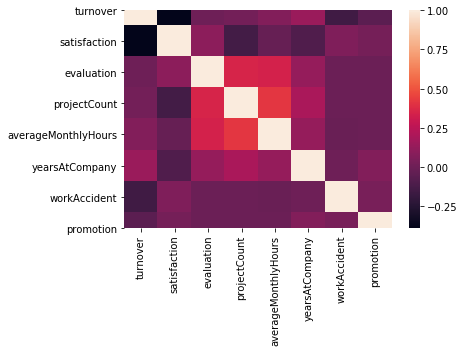

In [12]:
# Correlation matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

#  Distribution plots -- satisfaction, evaluation, averageMonthlyHours

Satisfaction - major spike for employees with low and high satisfaction
Evaluation - bimodal distribution of employees with low evaluations (less than 0.6) and high evaluations (more than 0.8)
AverageMonthlyHours - another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)

The evaluation and average monthly hour graphs show similar distributions, indicating the possibility of employees with lower average monthly hours being evaluated less and vice versa.
The correlation matrix shows a high correlation between evaluation and averageMonthlyHours, which supports this finding.

We can examine whether there is a correlation between evaluation & averageMonthlyHours and determine whether there is a reason for the sharp spike in employees' low satisfaction.

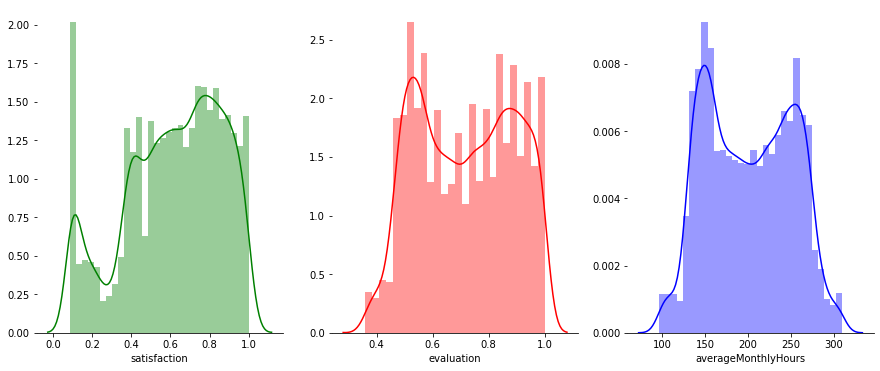

In [13]:
# set up matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.despine(left=True)

# graph employee satisfaction
sns.distplot(df.satisfaction, kde=True, color="g", ax=axes[0])

# graph employee evaluation
sns.distplot(df.evaluation, kde=True, color="r", ax=axes[1])

# graph employee average monthly hours
sns.distplot(df.averageMonthlyHours, kde=True, color="b", ax=axes[2])

# Salary vs turnover

Most employees who left had either low or medium salaries
Hardly any employees with high salaries left

Conclusion: employees with low to average salaries tend to leave the company.

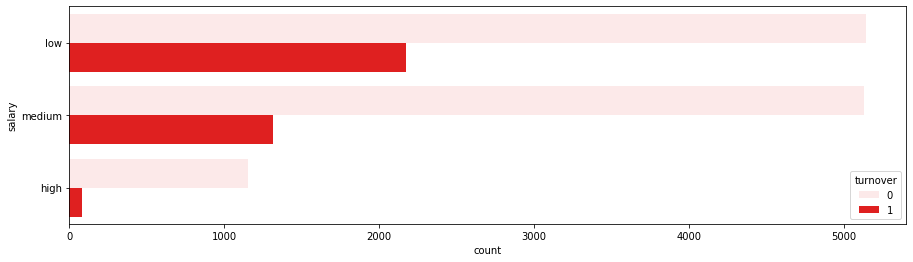

In [14]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df, color="r");

# Department vs turnover

Top 3 departments with employee turnover were sales, technical, and support.
The department with the least amount of employee turnover was management.

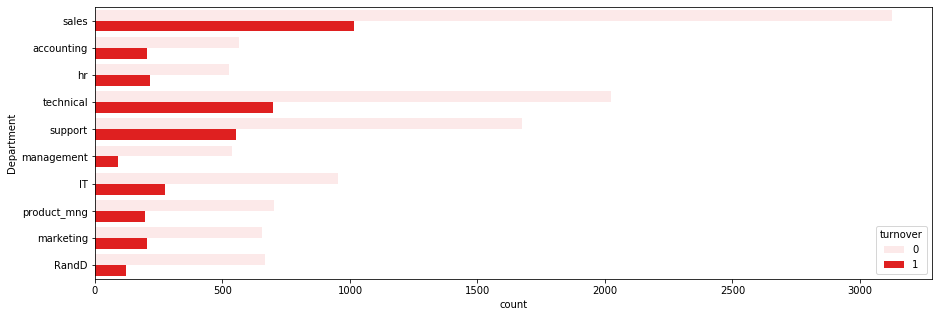

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='turnover', data=df, color="r");

# Turnover vs project count

Over half of employees with 2,6, and 7 projects left the company
Most employees who stayed had 3,4, and 5 projects
All employees with 7 projects left the company
There is an increase in employee turnover rate as project count increases

Questions to ponder:
Why are employees leaving at the lower/higher spectrum of project counts? Could this mean employees with 2 or less projects are underworked or lowly valued? Could employees with 6+ projects be overworked?

[Text(0, 0.5, 'Percent')]

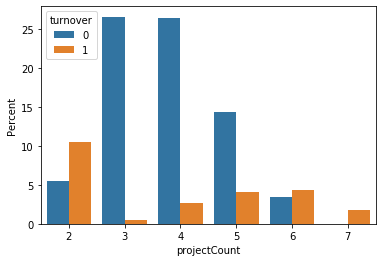

In [17]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

# Turnover vs evaluation

Bimodal distribution for turnover
Employees with low evaluations tend to leave the company
Employees with high evaluations tend to leave the company
Those who stayed are between 0.6-0.8

Text(0.5, 1.0, 'Last evaluation')

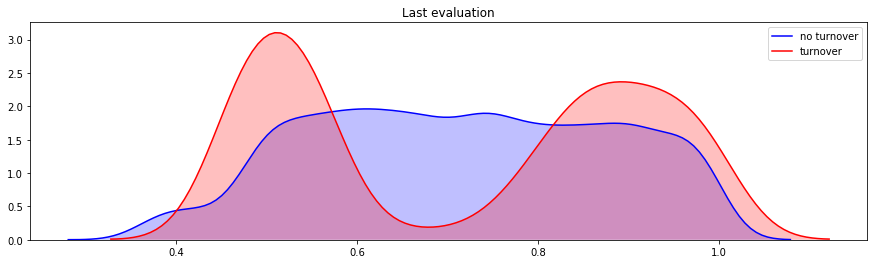

In [18]:
# Kernel Density plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

# Turnover vs averageMonthlyHours

another bimodal distrubtion for employees with turnover
Employees with less hours of work (~150hours or less) left the company
Employees with more hours of work (~250 or more) left the company
Conclusion: employees who left were generally either underworked or overworked.

Text(0.5, 1.0, 'Average monthly hours worked')

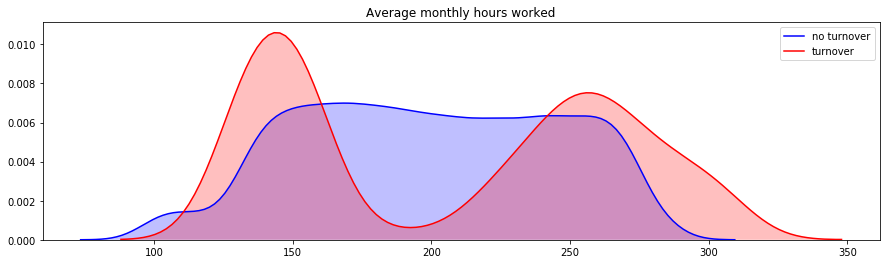

In [19]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

# Project count vs average monthly hours

As project count increased, so did average monthly hours
Boxplot graph shows employees without turnover had consistent averageMonthlyHours, despite the increase in projects
Conversely, employees with turnover had an increase in averageMonthlyHours with the increase in projects
Conclusion: employees who left worked more hours than employees who didn't, even with the same number of projects.

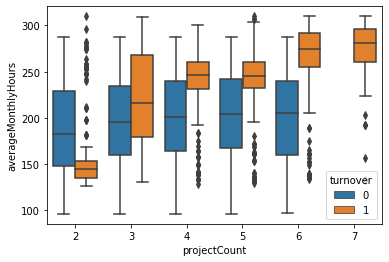

In [20]:
# ProjectCount vs averageMonthlyHours boxplot -- employees who stayed on average worked about 200hours/month. Employees who left worked ~250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

# Project count vs evaluation

This graph looks very similar to the above. Within the turnover group there is an increase in evaluation for employees who worked on more projects. However within the non-turnover group employees received consistent evaluations despite the increase in project count.

Conclusion: employees who left had on average higher evaluations than employees who stayed, even with an increase in project count (contradicts the general thinking that employees with lower evaluations would leave the company more).

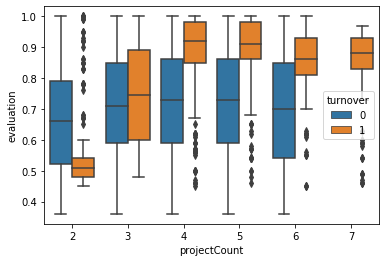

In [21]:
# ProjectCount vs evaluation -- employees who stayed had an average evaluation of ~70% even with different projectCounts
# heavy skew in employees with turnover -- drastically changes after 3 projectCounts 
# employees with two projects and terrible evaluations left, as did employees with > 3 projects and stellar evaluations
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

# Satisfaction vs evaluation

3 distinct clusters for employees who left:

Cluster 1 (hard-working and unhappy): 
Satisfaction below 0.2 and evaluations greater than 0.75. This could be a good indication that employees who left were hard workers but were unsatisfied with their job. Given their high evaluations, it's possible their dissatisfaction is derived from being overworked.

Cluster 2 (underachieving and unhappy): 
Satisfaction between ~0.35~0.45 and evaluations below ~0.58. This could portray employees who received low evaluations and were unhappy with their job.

Cluster 3 (hard-working and happy): 
Satisfaction between 0.7~1.0 and evaluations greater than 0.8. This could mean employees were evaluated well for their work and also enjoyed their job. This cluster could signify employees leaving due to finding other opportunities. 

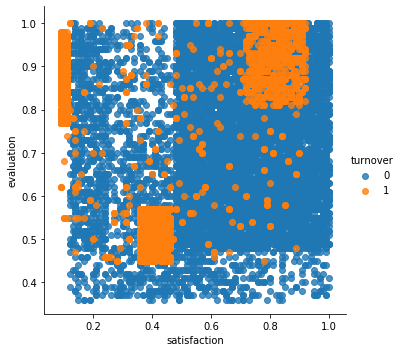

In [22]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # no regression line
           hue='turnover')   # color by evolution stage

# K-means clustering of employee turnover

Cluster 1 (blue): hard-working and unhappy

Cluster 2 (red): underachieving and unhappy

Cluster 3 (green): hard-working and happy

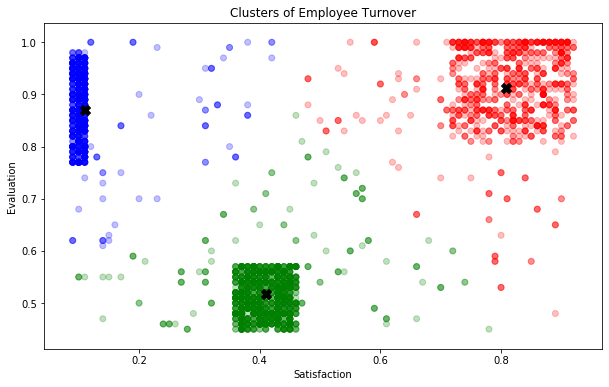

In [23]:
# import KMeans model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of employee turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# Model the data

# Interpret the data

Employees generally left when they were underworked -- less than 150hrs/month or 6hrs/day
Employees generally left when they were overworked -- more than 250hrs/month or 10hrs/day
Employees with very high or very low evaluations should be taken into consideration for high turnover rate
Employees with low to medium salaries comprised the majority of employee turnover
Employees with 2,6, or 7 projects were at risk of leaving the company
Employee satisfaction is the highest indicator of employee turnover

Conclusion: since satisfaction has the most effect on determining employee turnover, the underlying problem can be personal (micro) or company-wide (macro), having to do with issues concerning the company's core values and purpose. 

We should conduct more experiments and collect more data on employees to devise more accurate findings. Other variables that could have significant impact include commute time, gender, age, etc.